In [1]:
#IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import plotly_express as px
from plotly.subplots import make_subplots
import warnings 
warnings.filterwarnings('ignore')

In [4]:
import plotly.graph_objs as go

In [5]:
import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df_train= pd.read_csv('/kaggle/input/covid19-global-forecasting-week-4/train.csv')
df_test= pd.read_csv('/kaggle/input/covid19-global-forecasting-week-4/test.csv')

In [6]:
df_train.head()

Id Province_State Country_Region        Date  ConfirmedCases  Fatalities
0   1            NaN    Afghanistan  2020-01-22             0.0         0.0
1   2            NaN    Afghanistan  2020-01-23             0.0         0.0
2   3            NaN    Afghanistan  2020-01-24             0.0         0.0
3   4            NaN    Afghanistan  2020-01-25             0.0         0.0
4   5            NaN    Afghanistan  2020-01-26             0.0         0.0

In [7]:
df_train.shape

(35995, 6)

In [8]:
df_test.head()

ForecastId Province_State Country_Region        Date
0           1            NaN    Afghanistan  2020-04-02
1           2            NaN    Afghanistan  2020-04-03
2           3            NaN    Afghanistan  2020-04-04
3           4            NaN    Afghanistan  2020-04-05
4           5            NaN    Afghanistan  2020-04-06

In [9]:
df_test.tail()

ForecastId Province_State Country_Region        Date
13454       13455            NaN       Zimbabwe  2020-05-10
13455       13456            NaN       Zimbabwe  2020-05-11
13456       13457            NaN       Zimbabwe  2020-05-12
13457       13458            NaN       Zimbabwe  2020-05-13
13458       13459            NaN       Zimbabwe  2020-05-14

In [10]:
df_test.shape

(13459, 4)

In [11]:
df_test.shape[0]

13459

In [12]:
df_train.isnull().sum()

Id                    0
Province_State    20700
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [13]:
df_test.isnull().sum()

ForecastId           0
Province_State    7740
Country_Region       0
Date                 0
dtype: int64

In [14]:
df_train.dtypes

Id                  int64
Province_State     object
Country_Region     object
Date               object
ConfirmedCases    float64
Fatalities        float64
dtype: object

In [15]:
df_test.dtypes

ForecastId         int64
Province_State    object
Country_Region    object
Date              object
dtype: object

In [16]:
df_train.describe()

Id  ConfirmedCases    Fatalities
count  35995.000000    35995.000000  35995.000000
mean   17998.000000     3683.508737    243.560217
std    10391.005806    18986.978708   1832.966999
min        1.000000        0.000000      0.000000
25%     8999.500000        0.000000      0.000000
50%    17998.000000       19.000000      0.000000
75%    26996.500000      543.000000      7.000000
max    35995.000000   345813.000000  33998.000000

In [17]:
df_train.head()

Id Province_State Country_Region        Date  ConfirmedCases  Fatalities
0   1            NaN    Afghanistan  2020-01-22             0.0         0.0
1   2            NaN    Afghanistan  2020-01-23             0.0         0.0
2   3            NaN    Afghanistan  2020-01-24             0.0         0.0
3   4            NaN    Afghanistan  2020-01-25             0.0         0.0
4   5            NaN    Afghanistan  2020-01-26             0.0         0.0

In [18]:
df_train.groupby(['Province_State','Country_Region']).ConfirmedCases.describe()

count         mean          std   min     25%  \
Province_State Country_Region                                                  
Alabama        US              115.0  2344.730435  3394.643374   0.0     0.0   
Alaska         US              115.0   127.052174   154.952049   0.0     0.0   
Alberta        Canada          115.0  1504.469565  2197.845849   0.0     0.0   
Anguilla       United Kingdom  115.0     1.234783     1.452949   0.0     0.0   
Anhui          China           115.0   870.904348   276.318180   1.0   986.5   
...                              ...          ...          ...   ...     ...   
Wyoming        US              115.0   175.182609   237.436218   0.0     0.0   
Xinjiang       China           115.0    65.660870    22.118852   0.0    76.0   
Yukon          Canada          115.0     3.886957     4.706780   0.0     0.0   
Yunnan         China           115.0   161.260870    44.418877   1.0   173.0   
Zhejiang       China           115.0  1114.791304   315.684650  10.0  1174.5   

                                  50%     75%      max  
Province_State Country_Region                           
Alabama        US                78.0  4458.0  11373.0  
Alaska         US                 9.0   304.5    388.0  
Alberta        Canada           119.0  2196.5   6515.0  
Anguilla       United Kingdom     0.0     3.0      3.0  
Anhui          China            990.0   991.0    991.0  
...                               ...     ...      ...  
Wyoming        US                18.0   300.5    716.0  
Xinjiang       China             76.0    76.0     76.0  
Yukon          Canada             0.0     8.0     11.0  
Yunnan         China            176.0   184.0    185.0  
Zhejiang       China           1233.0  1268.0   1268.0  

[133 rows x 8 columns]

In [19]:
fig= px.pie(df_train, values= 'ConfirmedCases', names= 'Country_Region')
fig.update_traces(textposition= 'inside')
fig.update_layout(uniformtext_minsize= 12, uniformtext_mode= 'hide')
fig.show()

In [20]:
fig= px.pie(df_train, values= 'Fatalities', names= 'Country_Region', title= 'COVID Fatalities',
           hover_data=['ConfirmedCases'], labels={'ConfirmedCases':'ConfirmedCases'})
fig.show()

In [21]:
df_train.corr()

Id  ConfirmedCases  Fatalities
Id              1.000000        0.069018    0.049932
ConfirmedCases  0.069018        1.000000    0.890192
Fatalities      0.049932        0.890192    1.000000

In [22]:
df_train.corr()

Id  ConfirmedCases  Fatalities
Id              1.000000        0.069018    0.049932
ConfirmedCases  0.069018        1.000000    0.890192
Fatalities      0.049932        0.890192    1.000000

<AxesSubplot:>

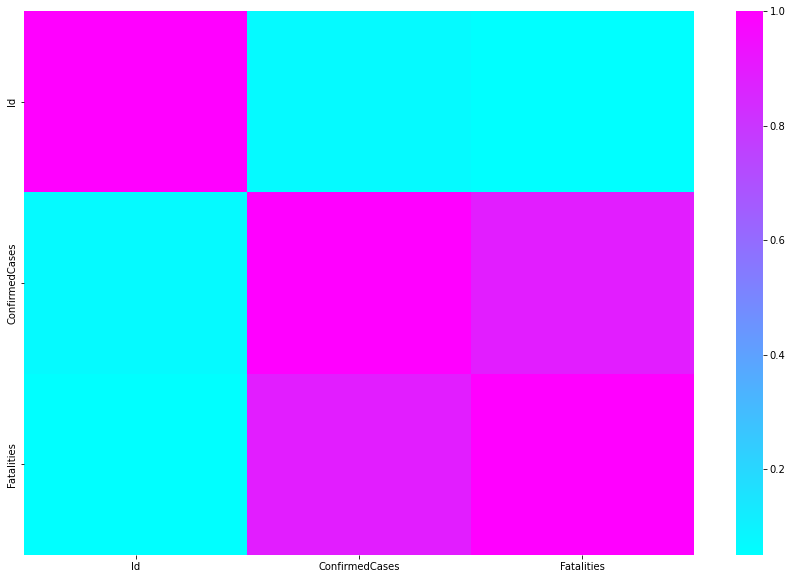

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(), cmap='cool')

In [24]:
fig= px.line(df_train, x='Date', y= 'Country_Region', range_x= ['2020-01-22', '2020-02-22'], range_y=['Afghanistan', 'Pakistan'])
fig.show()

In [25]:
fig= make_subplots(rows=1, cols=2, shared_yaxes= False,
                  subplot_titles= ("Cases", "Fatalities"))
fig.add_trace(go.Bar(x=df_train['Country_Region'], y=df_train['ConfirmedCases'],
                    ),
             1,1)
fig.add_trace(go.Bar(x=df_train['Country_Region'], y=df_train['Fatalities'],
                    ),
             1,2)
fig.update_layout(coloraxis= dict(colorscale= 'Bluered_r'), showlegend= False)
fig.show()

In [26]:
sum_of_data= pd.pivot_table(df_train, values=['ConfirmedCases', 'Fatalities'], index=['Date'],aggfunc=np.sum)
display(sum_of_data.max())

ConfirmedCases    4540926.0
Fatalities         307611.0
dtype: float64

In [27]:
def ColumnInfo(df):
    n_province =  df['Province_State'].nunique()
    n_country  =  df['Country_Region'].nunique()
    n_days     =  df['Date'].nunique()
    start_date =  df['Date'].unique()[0]
    end_date   =  df['Date'].unique()[-1]
    return n_province, n_country, n_days, start_date, end_date

In [28]:
df_test.head()

ForecastId Province_State Country_Region        Date
0           1            NaN    Afghanistan  2020-04-02
1           2            NaN    Afghanistan  2020-04-03
2           3            NaN    Afghanistan  2020-04-04
3           4            NaN    Afghanistan  2020-04-05
4           5            NaN    Afghanistan  2020-04-06

In [29]:
n_train = df_train.shape[0]
n_test = df_test.shape[0]
n_prov_train, n_count_train, n_train_days, start_date_train, end_date_train = ColumnInfo(df_train)
n_prov_test,  n_count_test,  n_test_days,  start_date_test,  end_date_test  = ColumnInfo(df_test)

In [30]:
df_test = df_test.loc[df_test.Date > '2020-04-03']
overlap_days = n_test_days - df_test.Date.nunique()
print('\n overlap days with training data: ', overlap_days, ', total days: ', n_train_days+n_test_days-overlap_days)


 overlap days with training data:  2 , total days:  156


In [31]:
#Country for the maximum cases

In [32]:
prob_confirm_check_train = df_train.ConfirmedCases.value_counts(normalize=True)
prob_fatal_check_train = df_train.Fatalities.value_counts(normalize=True)

n_confirm_train = df_train.ConfirmedCases.value_counts()[1:].sum()
n_fatal_train = df_train.Fatalities.value_counts()[1:].sum()

print('Percentage of confirmed case records = {0:<2.0f}/{1:<2.0f} = {2:<2.1f}%'.format(n_confirm_train, n_train, prob_confirm_check_train[1:].sum()*100))
print('Percentage of fatality records = {0:<2.0f}/{1:<2.0f} = {2:<2.1f}%'.format(n_fatal_train, n_train, prob_fatal_check_train[1:].sum()*100))


Percentage of confirmed case records = 23521/35995 = 65.3%
Percentage of fatality records = 15706/35995 = 43.6%


In [33]:
#lets try creating some new features like Confirmed Cases and Fatalities on daily basis, groeth factor and Mortality rate

In [34]:
df_train['NewConfirmedCases'] = df_train['ConfirmedCases'] - df_train['ConfirmedCases'].shift(1)
df_train['NewConfirmedCases'] = df_train['NewConfirmedCases'].fillna(0.0)
df_train['NewFatalities']     = df_train['Fatalities'] - df_train['Fatalities'].shift(1)
df_train['NewFatalities']     = df_train['NewFatalities'].fillna(0.0)#.astype(int)
df_train['MortalityRate']     = df_train['Fatalities'] / df_train['ConfirmedCases']
df_train['MortalityRate']     = df_train['MortalityRate'].fillna(0.0)
df_train['GrowthRate']        = df_train['NewConfirmedCases']/df_train['NewConfirmedCases'].shift(1)
df_train['GrowthRate']        = df_train['GrowthRate'].replace([-np.inf, np.inf],  0.0)
df_train['GrowthRate']        = df_train['GrowthRate'].fillna(0.0) 
display(df_train.head())

Id Province_State Country_Region        Date  ConfirmedCases  Fatalities  \
0   1            NaN    Afghanistan  2020-01-22             0.0         0.0   
1   2            NaN    Afghanistan  2020-01-23             0.0         0.0   
2   3            NaN    Afghanistan  2020-01-24             0.0         0.0   
3   4            NaN    Afghanistan  2020-01-25             0.0         0.0   
4   5            NaN    Afghanistan  2020-01-26             0.0         0.0   

   NewConfirmedCases  NewFatalities  MortalityRate  GrowthRate  
0                0.0            0.0            0.0         0.0  
1                0.0            0.0            0.0         0.0  
2                0.0            0.0            0.0         0.0  
3                0.0            0.0            0.0         0.0  
4                0.0            0.0            0.0         0.0

In [35]:
df_train_by_country = df_train.groupby(['Date','Country_Region'],as_index=False).agg({'ConfirmedCases': 'sum', 'Fatalities': 'sum',
                                                                                         'GrowthRate':'last' })

In [36]:
#display(df_train_by_country.tail(10))
max_train_date = df_train['Date'].max()
df_train_by_country_confirm = df_train_by_country.query('(Date == @max_train_date) & (ConfirmedCases > 100)').sort_values('ConfirmedCases', ascending=False)
df_train_by_country_confirm.set_index('Country_Region', inplace=True)

df_train_by_country_confirm.style.background_gradient(cmap='PuBu_r').format({'ConfirmedCases': "{:.0f}", 'GrowthRate': "{:.2f}"})

In [37]:
#First 20 Countries with Highest Confirmed Cases

In [38]:
from itertools import islice
from itertools import cycle

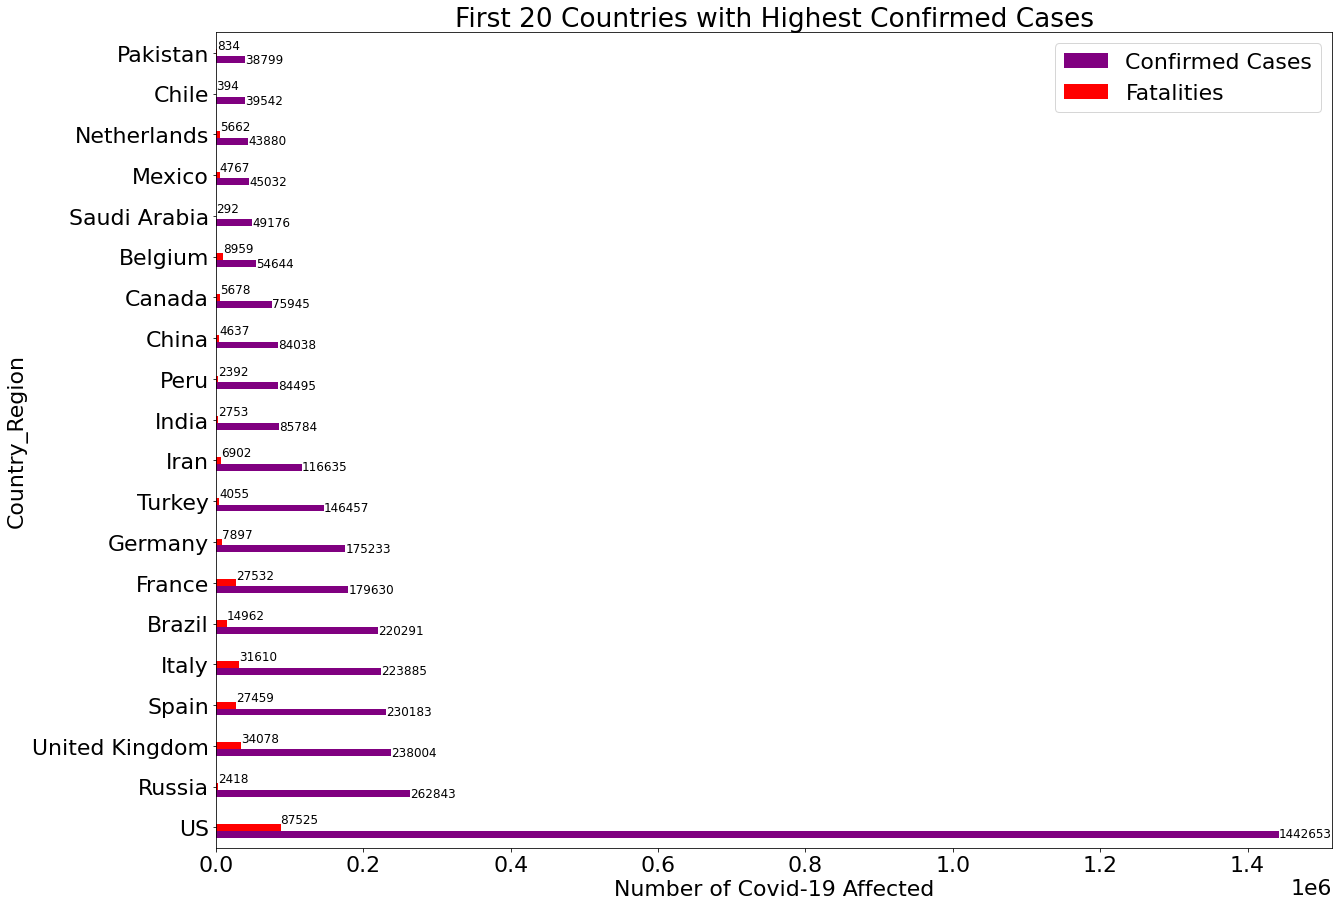

In [39]:
discrete_col = list(islice(cycle(['purple', 'r', 'g', 'k', 'b', 'c', 'm']), None, len(df_train_by_country_confirm.head(30))))
plt.rcParams.update({'font.size': 22})
df_train_by_country_confirm.head(20).plot(figsize=(20,15), kind='barh', color=discrete_col)
plt.legend(["Confirmed Cases", "Fatalities"]);
plt.xlabel("Number of Covid-19 Affected")
plt.title("First 20 Countries with Highest Confirmed Cases")
ylocs, ylabs = plt.yticks()
for i, v in enumerate(df_train_by_country_confirm.head(20)["ConfirmedCases"][:]):
    plt.text(v+0.01, ylocs[i]-0.25, str(int(v)), fontsize=12)
for i, v in enumerate(df_train_by_country_confirm.head(20)["Fatalities"][:]):
    if v > 0: #disply for only >300 fatalities
        plt.text(v+0.01,ylocs[i]+0.1,str(int(v)),fontsize=12) 

In [40]:
#Plots of Confirmed cases and Fatalities for nations with fatalities>500

In [41]:
def reformat_time(reformat, ax):
    ax.xaxis.set_major_locator(dates.WeekdayLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b %d'))    
    if reformat: #reformat again if you wish
        date_list = df_train_by_date.reset_index()["Date"].tolist()
        x_ticks = [dt.datetime.strftime(t,'%Y-%m-%d') for t in date_list]
        x_ticks = [tick for i,tick in enumerate(x_ticks) if i%8==0 ]# split labels into same number of ticks as by pandas
        ax.set_xticklabels(x_ticks, rotation=90)
    # cosmetics
    ax.yaxis.grid(linestyle='dotted')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['bottom'].set_color('none')

df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train_by_date = df_train.groupby(['Date'],as_index=True).agg({'ConfirmedCases': 'sum','Fatalities': 'sum', 
                                                                     'NewConfirmedCases':'sum', 'NewFatalities':'sum', 'MortalityRate':'mean'})
num0 = df_train_by_date._get_numeric_data() 
num0[num0 < 0.0] = 0.0
#display(train_data_by_date.head())

## ======= Sort by countries with fatalities > 500 ========      
        
   


In [42]:
import datetime
import matplotlib.dates as dates

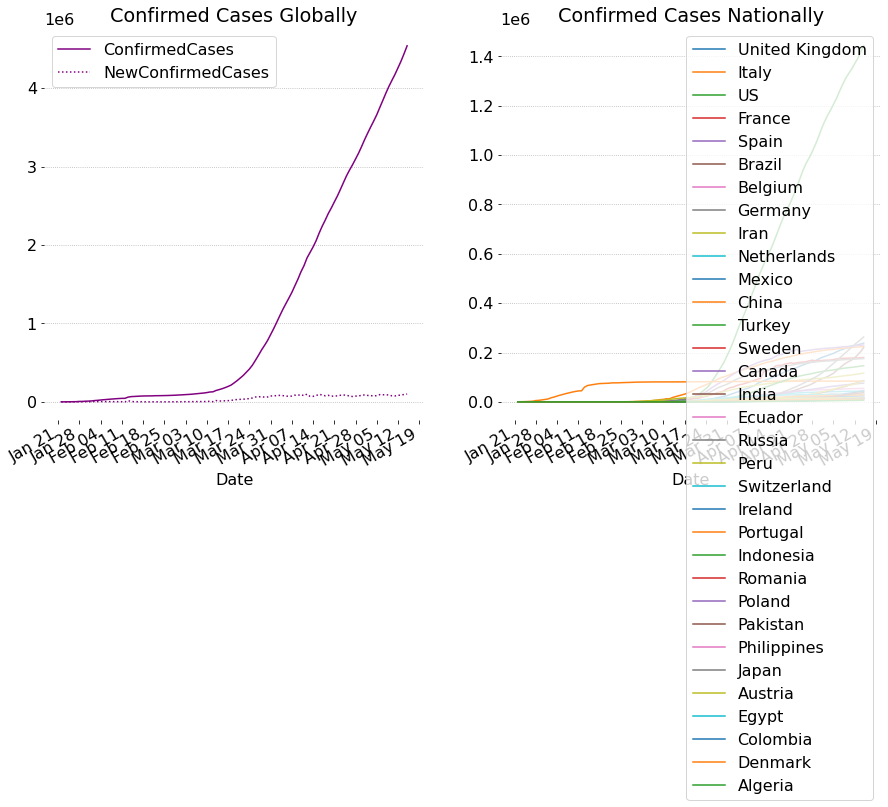

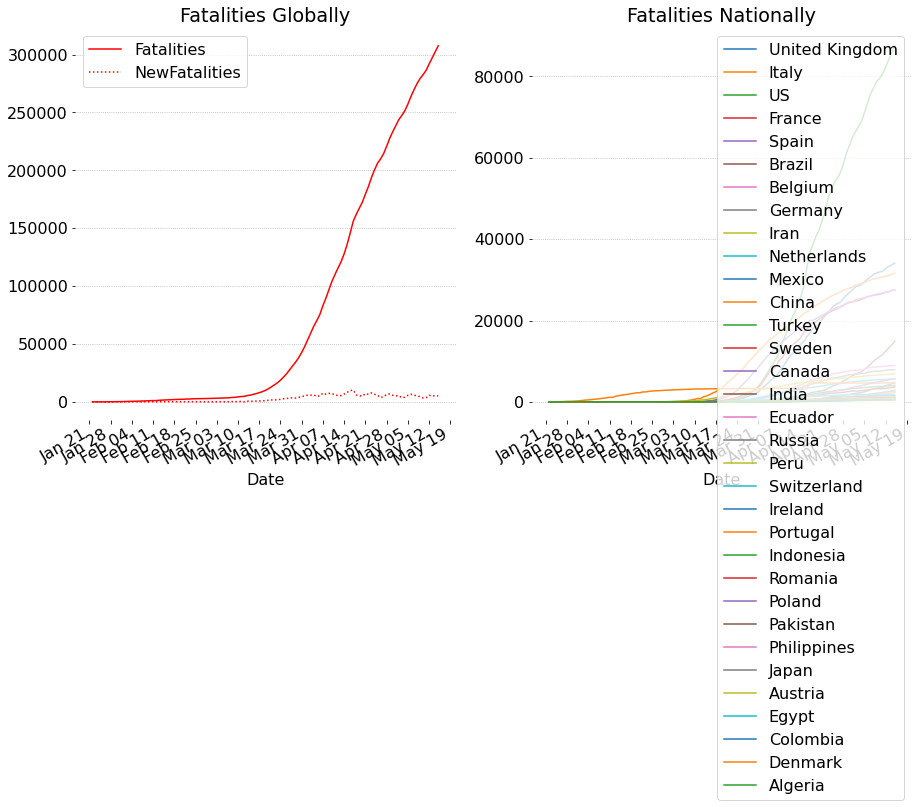

In [43]:
df_train_by_country_max = df_train.groupby(['Country_Region'],as_index=True).agg({'ConfirmedCases': 'max', 'Fatalities': 'max'})
df_train_by_country_fatal = df_train_by_country_max[df_train_by_country_max['Fatalities']>500]
df_train_by_country_fatal = df_train_by_country_fatal.sort_values(by=['Fatalities'],ascending=False).reset_index()
#display(train_data_by_country_fatal.head(20))

df_merge_by_country = pd.merge(df_train,df_train_by_country_fatal['Country_Region'],on=['Country_Region'],how='inner')
df_max_fatality_country = df_merge_by_country.groupby(['Date','Country_Region'],as_index=False).agg({'ConfirmedCases': 'sum',
                                                                                                     'Fatalities': 'sum',
                                                                                                     'NewConfirmedCases':'sum',
                                                                                                     'NewFatalities':'sum',
                                                                                                     'MortalityRate':'mean'})

num1 = df_max_fatality_country._get_numeric_data() 
num1[num1 < 0.0] = 0.0
df_max_fatality_country.set_index('Date',inplace=True)
#display(df_max_fatality_country.head(20))
     


countries = df_train_by_country_fatal['Country_Region'].unique()

plt.rcParams.update({'font.size': 16})

fig,(ax0,ax1) = plt.subplots(1,2,figsize=(15, 8))
fig,(ax2,ax3) = plt.subplots(1,2,figsize=(15, 8))#,sharey=True)

df_train_by_date.ConfirmedCases.plot(ax=ax0, x_compat=True, title='Confirmed Cases Globally', legend='Confirmed Cases',
                                       color=discrete_col)#, logy=True)
reformat_time(0,ax0)
df_train_by_date.NewConfirmedCases.plot(ax=ax0, x_compat=True, linestyle='dotted', legend='New Confirmed Cases',
                                          color=discrete_col)#, logy=True)
reformat_time(0,ax0)

df_train_by_date.Fatalities.plot(ax=ax2, x_compat=True, title='Fatalities Globally', legend='Fatalities', color='r')
reformat_time(0,ax2)
df_train_by_date.NewFatalities.plot(ax=ax2, x_compat=True, linestyle='dotted', legend='Daily Deaths',color='r')#tell pandas not to use its own datetime format
reformat_time(0,ax2)

for country in countries:
    match = df_max_fatality_country.Country_Region==country
    df_fatality_by_country = df_max_fatality_country[match] 
    df_fatality_by_country.ConfirmedCases.plot(ax=ax1, x_compat=True, title='Confirmed Cases Nationally')
    reformat_time(0,ax1)
    df_fatality_by_country.Fatalities.plot(ax=ax3, x_compat=True, title='Fatalities Nationally')
    reformat_time(0,ax3)
    
ax1.legend(countries)
ax3.legend(countries)

<Figure size 432x288 with 0 Axes>

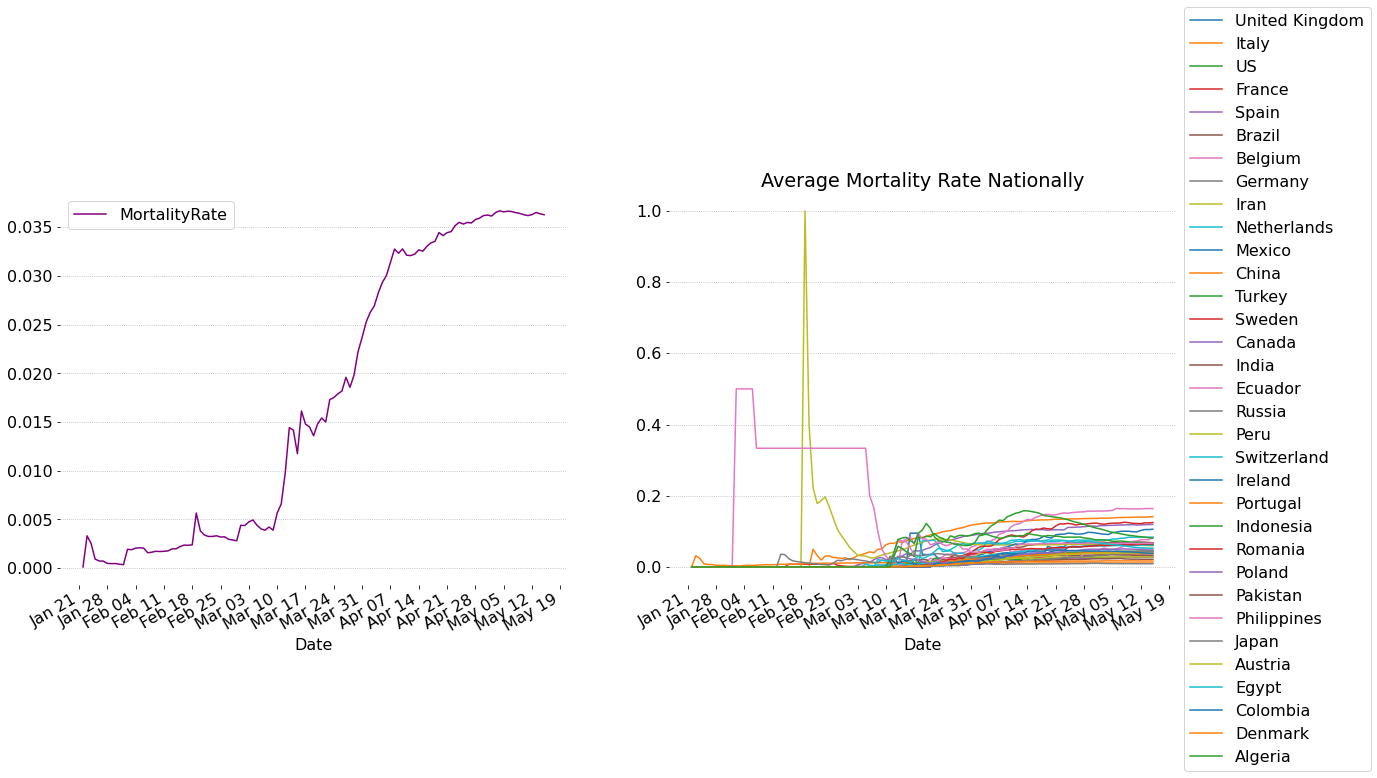

In [44]:
fig = plt.figure()
fig,(ax4,ax5) = plt.subplots(1,2,figsize=(20, 8))
#train_data_by_date.loc[(train_data_by_date.ConfirmedCases > 200)]#useless, its already summed.
df_train_by_date.MortalityRate.plot(ax=ax4, x_compat=True, legend='Mortality Rate',color='purple')#tell pandas not to use its own datetime format
reformat_time(0,ax4)

for num, country in enumerate(countries):
    match = df_max_fatality_country.Country_Region==country 
    df_fatality_by_country = df_max_fatality_country[match] 
    df_fatality_by_country.MortalityRate.plot(ax=ax5, x_compat=True, title='Average Mortality Rate Nationally')    
    reformat_time(0,ax5)

ax5.legend(countries, loc='center left',bbox_to_anchor=(1.0, 0.5)) 

In [45]:
#First 20 counttries with highest Mortality Rate

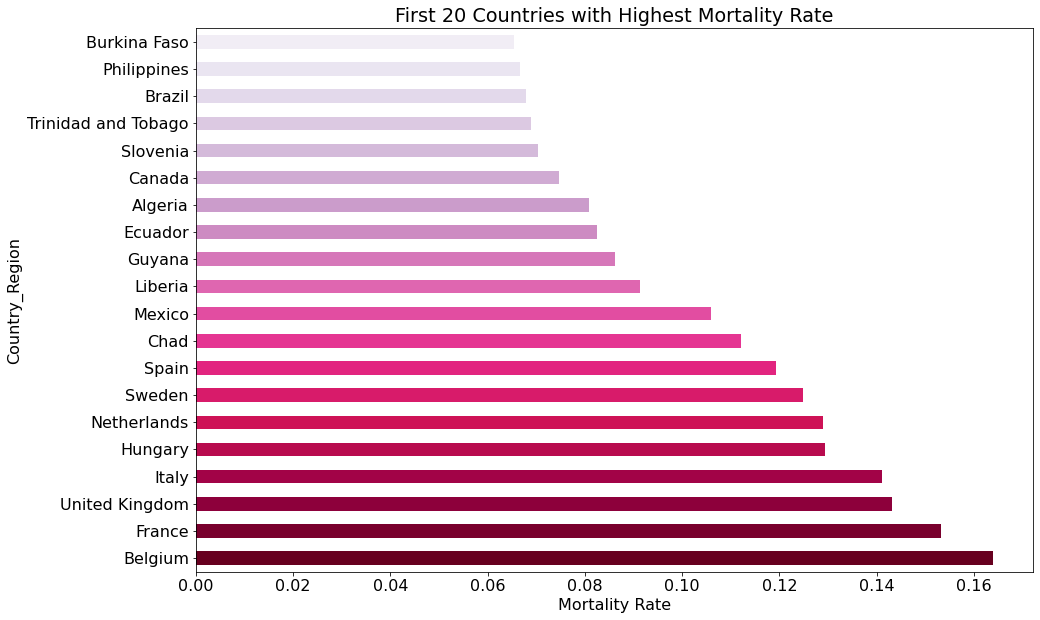

In [46]:
df_train_by_max_date = df_train_by_country.query('(Date == @max_train_date) & (ConfirmedCases > 100)')
df_train_by_max_date.loc[:, 'MortalityRate'] = df_train_by_max_date.loc[:,'Fatalities']/df_train_by_max_date.loc[:,'ConfirmedCases']
df_train_by_mortality = df_train_by_max_date.sort_values('MortalityRate', ascending=False)
df_train_by_mortality.set_index('Country_Region', inplace=True)
#display(train_data_by_mortality.head())

palette = plt.get_cmap('PuRd_r')
rainbow_col = [palette(1.*i/20.0) for i in range(20)]

df_train_by_mortality.MortalityRate.head(20).plot(figsize=(15,10), kind='barh', color=rainbow_col)
plt.xlabel("Mortality Rate")
plt.title("First 20 Countries with Highest Mortality Rate")
ylocs, ylabs = plt.yticks() 

In [47]:
print(f"Unique Countries: {len(df_train.Country_Region.unique())}")

train_dates=list(df_train.Date.unique())
print(f"Period : {len(df_train.Date.unique())} days")
print(f"From : {df_train.Date.min()} To : {df_train.Date.max()}")

Unique Countries: 184
Period : 115 days
From : 2020-01-22 00:00:00 To : 2020-05-15 00:00:00


In [48]:
print(f"Unique Regions: {df_train.shape[0]/75}")
df_train.Country_Region.value_counts()

Unique Regions: 479.93333333333334


US                6210
China             3795
Canada            1380
France            1265
United Kingdom    1265
                  ... 
Ghana              115
Greece             115
Grenada            115
Guatemala          115
Zimbabwe           115
Name: Country_Region, Length: 184, dtype: int64

In [49]:
# delete the unwanted columns/attributes.
df_train.drop(labels=["Id","Province_State",], axis=1, inplace=True)
df_train

Country_Region       Date  ConfirmedCases  Fatalities  \
0        Afghanistan 2020-01-22             0.0         0.0   
1        Afghanistan 2020-01-23             0.0         0.0   
2        Afghanistan 2020-01-24             0.0         0.0   
3        Afghanistan 2020-01-25             0.0         0.0   
4        Afghanistan 2020-01-26             0.0         0.0   
...              ...        ...             ...         ...   
35990       Zimbabwe 2020-05-11            36.0         4.0   
35991       Zimbabwe 2020-05-12            36.0         4.0   
35992       Zimbabwe 2020-05-13            37.0         4.0   
35993       Zimbabwe 2020-05-14            37.0         4.0   
35994       Zimbabwe 2020-05-15            42.0         4.0   

       NewConfirmedCases  NewFatalities  MortalityRate  GrowthRate  
0                    0.0            0.0       0.000000         0.0  
1                    0.0            0.0       0.000000         0.0  
2                    0.0            0.0       0.000000         0.0  
3                    0.0            0.0       0.000000         0.0  
4                    0.0            0.0       0.000000         0.0  
...                  ...            ...            ...         ...  
35990                0.0            0.0       0.111111         0.0  
35991                0.0            0.0       0.111111         0.0  
35992                1.0            0.0       0.108108         0.0  
35993                0.0            0.0       0.108108         0.0  
35994                5.0            0.0       0.095238         0.0  

[35995 rows x 8 columns]

In [50]:
#IMPLEMENTING LINEAR REGRESSION

In [51]:
import matplotlib.dates as dates

In [52]:
test_dates=list(df_test.Date.unique())
print(f"Period :{len(df_test.Date.unique())} days")
print(f"From : {df_test.Date.min()} To : {df_test.Date.max()}")
print(f"Total Regions : {df_test.shape[0]/43}")


df_test["UniqueRegion"]=df_test.Country_Region
df_test.UniqueRegion[df_test.Province_State.isna()==False]=df_test.Province_State+" , "+df_test.Country_Region
df_test.drop(labels=["Province_State","Country_Region"], axis=1, inplace=True)
len(df_test.UniqueRegion.unique())

Period :41 days
From : 2020-04-04 To : 2020-05-14
Total Regions : 298.4418604651163


313

In [53]:
df_test_temp=pd.DataFrame()
df_test_temp["Date"]=df_test.Date
df_test_temp["ConfirmedCases"]=0.0
df_test_temp["Fatalities"]=0.0
df_test_temp["UniqueRegion"]=df_test.UniqueRegion
df_test_temp["f Clta"]=1.0       
     
display(df_test_temp) 

Date  ConfirmedCases  Fatalities UniqueRegion  f Clta
2      2020-04-04             0.0         0.0  Afghanistan     1.0
3      2020-04-05             0.0         0.0  Afghanistan     1.0
4      2020-04-06             0.0         0.0  Afghanistan     1.0
5      2020-04-07             0.0         0.0  Afghanistan     1.0
6      2020-04-08             0.0         0.0  Afghanistan     1.0
...           ...             ...         ...          ...     ...
13454  2020-05-10             0.0         0.0     Zimbabwe     1.0
13455  2020-05-11             0.0         0.0     Zimbabwe     1.0
13456  2020-05-12             0.0         0.0     Zimbabwe     1.0
13457  2020-05-13             0.0         0.0     Zimbabwe     1.0
13458  2020-05-14             0.0         0.0     Zimbabwe     1.0

[12833 rows x 5 columns]

In [54]:
#Implementing Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
df_final=pd.DataFrame(columns=["Date","ConfirmedCases","Fatalities","UniqueRegion"])

for region in df_train.Country_Region.unique():
    df_temp=df_train[df_train.Country_Region==region].reset_index()
    df_temp["Delta"]=1.0
    size_train=df_temp.shape[0]
    for i in range(1,df_temp.shape[0]):
        if(df_temp.ConfirmedCases[i-1]>0):
            df_temp.Delta[i]=df_temp.ConfirmedCases[i]/df_temp.ConfirmedCases[i-1]
            #number of days for delta trend
    n=5     

    #delta as average of previous n days
    delta_avg=df_temp.tail(n).Delta.mean()

    #delta as trend for previous n days
    delta_list=df_temp.tail(n).Delta
    death_rate=df_temp.tail(1).Fatalities.sum()/df_temp.tail(1).ConfirmedCases.sum()
    df_test_app=df_test_temp[df_test_temp.UniqueRegion==region]
    
    X=np.arange(1,n+1).reshape(-1,1)
    Y=delta_list
    model=LinearRegression()
    model.fit(X,Y)

    df_temp=pd.concat([df_temp,df_test_app])
    df_temp=df_temp.reset_index()

    for i in range (size_train, df_temp.shape[0]):
        n=n+1
        df_temp.Delta[i]=max(1,model.predict(np.array([n]).reshape(-1,1))[0])
        df_temp.ConfirmedCases[i]=round(df_temp.ConfirmedCases[i-1]*df_temp.Delta[i],0)
        df_temp.Fatalities[i]=round(death_rate*df_temp.ConfirmedCases[i],0)


    size_test=df_temp.shape[0]-df_test_temp[df_test_temp.UniqueRegion==region].shape[0]

    df_temp=df_temp.iloc[size_test:,:]
    
    df_temp=df_temp[["Date","ConfirmedCases","Fatalities","UniqueRegion"]]
    df_final=pd.concat([df_final,df_temp], ignore_index=True)
    
df_final.shape

(7380, 4)

In [57]:
df_final.Fatalities

0       1.650000e+02
1       1.780000e+02
2       1.930000e+02
3       2.100000e+02
4       2.300000e+02
            ...     
7375    7.829182e+07
7376    1.654826e+08
7377    3.542470e+08
7378    7.679075e+08
7379    1.685361e+09
Name: Fatalities, Length: 7380, dtype: float64

In [58]:
df_final.ConfirmedCases

0       6.519000e+03
1       7.046000e+03
2       7.642000e+03
3       8.317000e+03
4       9.083000e+03
            ...     
7375    8.220641e+08
7376    1.737567e+09
7377    3.719594e+09
7378    8.063029e+09
7379    1.769629e+10
Name: ConfirmedCases, Length: 7380, dtype: float64

In [59]:
df_sub=pd.read_csv('/kaggle/input/covid19-global-forecasting-week-4/submission.csv')

In [60]:
df_sub.Fatalities=df_final.Fatalities
df_sub.ConfirmedCases=df_final.ConfirmedCases
df_sub.to_csv("LR_submission.csv", index=None)

In [61]:
'''NewConfirmedCases    0
NewFatalities        0
MortalityRate        0
GrowthRate    '''

'NewConfirmedCases    0\nNewFatalities        0\nMortalityRate        0\nGrowthRate    '

In [62]:
df_train

Country_Region       Date  ConfirmedCases  Fatalities  \
0        Afghanistan 2020-01-22             0.0         0.0   
1        Afghanistan 2020-01-23             0.0         0.0   
2        Afghanistan 2020-01-24             0.0         0.0   
3        Afghanistan 2020-01-25             0.0         0.0   
4        Afghanistan 2020-01-26             0.0         0.0   
...              ...        ...             ...         ...   
35990       Zimbabwe 2020-05-11            36.0         4.0   
35991       Zimbabwe 2020-05-12            36.0         4.0   
35992       Zimbabwe 2020-05-13            37.0         4.0   
35993       Zimbabwe 2020-05-14            37.0         4.0   
35994       Zimbabwe 2020-05-15            42.0         4.0   

       NewConfirmedCases  NewFatalities  MortalityRate  GrowthRate  
0                    0.0            0.0       0.000000         0.0  
1                    0.0            0.0       0.000000         0.0  
2                    0.0            0.0       0.000000         0.0  
3                    0.0            0.0       0.000000         0.0  
4                    0.0            0.0       0.000000         0.0  
...                  ...            ...            ...         ...  
35990                0.0            0.0       0.111111         0.0  
35991                0.0            0.0       0.111111         0.0  
35992                1.0            0.0       0.108108         0.0  
35993                0.0            0.0       0.108108         0.0  
35994                5.0            0.0       0.095238         0.0  

[35995 rows x 8 columns]

In [63]:
df_train=df_train.drop(columns=['NewConfirmedCases','NewFatalities','MortalityRate','GrowthRate'])

In [64]:
#IMplementing XGBoost

df_train.isnull().sum()

Country_Region    0
Date              0
ConfirmedCases    0
Fatalities        0
dtype: int64

In [65]:
df_train.Date = df_train.Date.apply(pd.to_datetime)
df_test.Date = df_test.Date.apply(pd.to_datetime)

In [66]:
#converting the features to int
df_train.Date = df_train.Date.dt.strftime("%m%d").astype(int)
df_test.Date = df_test.Date.dt.strftime("%m%d").astype(int)

In [67]:
#Label encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [68]:
df_test

ForecastId  Date UniqueRegion
2               3   404  Afghanistan
3               4   405  Afghanistan
4               5   406  Afghanistan
5               6   407  Afghanistan
6               7   408  Afghanistan
...           ...   ...          ...
13454       13455   510     Zimbabwe
13455       13456   511     Zimbabwe
13456       13457   512     Zimbabwe
13457       13458   513     Zimbabwe
13458       13459   514     Zimbabwe

[12833 rows x 3 columns]

In [69]:
df_test=df_test.rename(columns={"UniqueRegion": "Country_Region"})

In [70]:
df_train.Country_Region = le.fit_transform(df_train.Country_Region)

df_test.Country_Region = le.fit_transform(df_test.Country_Region)

In [71]:
df_train.select_dtypes(include = "object").columns

Index([], dtype='object')

In [72]:
X_train = df_train.drop(["ConfirmedCases", "Fatalities"], axis = 1) 
Y_train_CC = df_train["ConfirmedCases"] 
Y_train_Fat = df_train["Fatalities"] 

X_test = df_test.drop(["ForecastId"], axis = 1) 

In [73]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
skfold= ShuffleSplit(random_state=7)

In [74]:
X_train

Country_Region  Date
0                   0   122
1                   0   123
2                   0   124
3                   0   125
4                   0   126
...               ...   ...
35990             183   511
35991             183   512
35992             183   513
35993             183   514
35994             183   515

[35995 rows x 2 columns]

In [75]:
Y_train_CC

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
35990    36.0
35991    36.0
35992    37.0
35993    37.0
35994    42.0
Name: ConfirmedCases, Length: 35995, dtype: float64

In [76]:
X_test

Date  Country_Region
2       404               0
3       405               0
4       406               0
5       407               0
6       408               0
...     ...             ...
13454   510             312
13455   511             312
13456   512             312
13457   513             312
13458   514             312

[12833 rows x 2 columns]

In [77]:
import xgboost as xgb

In [78]:
clf_xgb_CC = xgb.XGBRegressor(n_estimators = 40000)
clf_xgb_Fat = xgb.XGBRegressor(n_estimators = 20000)
xgb_acc = cross_val_score(clf_xgb_CC, X_train, Y_train_CC, cv = skfold)
xgb_acc_fat = cross_val_score(clf_xgb_Fat, X_train, Y_train_Fat, cv = skfold)

print (xgb_acc.mean(), xgb_acc_fat.mean())

0.5495238466689616 0.43494922034538186


In [79]:
clf_xgb_CC.fit(X_train, Y_train_CC)
Y_pred_CC = clf_xgb_CC.predict(X_test) 

clf_xgb_Fat.fit(X_train, Y_train_Fat)
Y_pred_Fat = clf_xgb_Fat.predict(X_test) 

In [80]:
print (Y_pred_Fat)

[ 0.00102103  0.00102103  0.00102103 ... -0.00368874 -0.00368874
 -0.00368874]


In [81]:
df_out = pd.DataFrame({'ForecastId': [], 'ConfirmedCases': [], 'Fatalities': []})
soln = pd.DataFrame({'ForecastId': df_test.ForecastId, 'ConfirmedCases': Y_pred_CC, 'Fatalities': Y_pred_Fat})
df_out = pd.concat([df_out, soln], axis=0)
df_out.ForecastId = df_out.ForecastId.astype('int')
df_out.to_csv('xgb_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [82]:
df_out.describe()

ForecastId  ConfirmedCases    Fatalities
count  12833.000000    12833.000000  12833.000000
mean    6731.000000       -0.000407      0.000179
std     3885.428211        0.005503      0.001622
min        3.000000       -0.022168     -0.008219
25%     3367.000000       -0.001422     -0.000577
50%     6731.000000       -0.001422      0.001021
75%    10095.000000        0.005256      0.001021
max    13459.000000        0.025982      0.013384